In [210]:
def pred_scores(score_1, score_2):
    """ Takes the top two scores for the read and returns score
    """
    return (float(score_1) - float(score_2))/float(score_1)


def get_preds(input_path, thresh): 
    """ Takes the input path for .aln files and parses them 
        Returns predicted values, names, probabilities (confidence)
    """

    ## initializing storage vars
    pred_vals = []
    names = []
    prob = []
    align_names = []


    # open preds file
    input_preds = open(input_path, "r")
    
    

    while True: 
    
        # read in new line
        line = input_preds.readline()
    
        if not line:
            break
            
        # find the name of the line
        name = line.partition("	")[0]
        
        
        
        if name in names: 
            pass
        
        else: 
            
            align_names.append(line.split("	")[1])

            # add the name to names
            names.append(name)
            
            # get the scores
            score_1 = line.split("	")[3]
            
            # get second line scores
            line = input_preds.readline()
            #print(line)
            try:
                score_2 = line.split("	")[3]
            except:
                pass
            # add probability
            curr_prob = pred_scores(score_1, score_2)
            prob.append(curr_prob)
            
            if curr_prob>thresh:
                pred_vals.append(1)
            else:
                pred_vals.append(0)
                
                
    # adding the negative preds
    
                
    input_preds.close()      
    return(pred_vals, names, prob, align_names)
                

    
def get_true(input_path): 
    """ Takes the input path for .aln files and parses them 
        Returns true values, names
    """

    ## initializing storage vars
    true_vals = []
    names = []
    align_names = []

    
    neg_vals = []
    neg_aligns = []
    negative_names = ['DNAH8-lcl|NC-000006_519_unaligned_96_F_0_12310_0', 'MUC16-lcl|NC-000019_8783_unaligned_92_R_0_19699_0', 'FSIP2-lcl|NC-000002_3053_unaligned_97_R_0_15975_0', 'MDN1-lcl|NC-000006_3010_unaligned_95_R_0_10857_0', 'MUC12-lcl|NC-000007_741_unaligned_90_F_0_15088_0', 'MUC16-lcl|NC-000019_12555_unaligned_92_R_0_21205_0']

    
    # open preds file
    input_true = open(input_path, "r")

    while True: 
    
        # read in new line
        line = input_true.readline()
    
        if not line:
            break
            
        # find the name of the line
        name = line.partition("	")[0]
                
        if name in negative_names:
            # align name
            neg_aligns.append(line.split("	")[1])
        
            # true_vals
            if len(line.split("	")[1]) < 4: 
                neg_vals.append(0)
            else:
                neg_vals.append(1)
        else:
            names.append(name)
        
            # align name
            align_names.append(line.split("	")[1])
        
            # true_vals
            if len(line.split("	")[1]) < 4: 
                true_vals.append(0)
            else:
                true_vals.append(1)
                
    # adding the negatives back in
    names.extend(negative_names)
    true_vals.extend(neg_vals)
    align_names.extend(neg_aligns)
    

    input_true.close()
    return(true_vals, names, align_names)

       
def conf_mat(true_vals, true_aligns, pred_vals, pred_aligns, names):
    """ Returns tp, tn, fp, fn of reads, as well as false positive case 2 reads (alignment to incorrect protein)
    """
    
    tp = []
    tn = []
    fp = []
    fn = []
    
    wrong_aln = []
    
    for i in range(len(pred_vals)):
        
        #if not true_aligns[i].strip() == pred_aligns[i]:
           # print(true_aligns[i].strip() + " |||" + pred_aligns[i])
        
        # true negative case
        if true_vals[i] == 0 and pred_vals[i] == 0:
            tn.append(names[i])
            
        # false negative case
        elif true_vals[i] == 1 and pred_vals[i] == 0:
            fn.append(names[i])
        
        # true positive 
        elif true_vals[i] == 1 and pred_vals[i] == 1 and true_aligns[i].strip() == pred_aligns[i]:
            tp.append(names[i])
        
        # false positive case 1
        elif true_vals[i] == 0 and pred_vals[i] == 1:
            fp.append(names[i]) 
        
        # false positive case 2
        elif true_vals[i] == 1 and pred_vals[i] == 1 and not true_aligns[i].strip() == pred_aligns[i]:
            fp.append(names[i])
            wrong_aln.append(names[i])
            
    return(tp, tn, fp, fn, wrong_aln)
        
    
        

In [206]:
from functools import reduce
from operator import iconcat

def get_results(thresh):
    
    # parsing the files
    pred_vals = []
    names = []
    pred_prob = []
    pred_aligns = []


    input_aln_list = ["cs675_proj_group62/results/simulated_reads_1_2_combined.n60_1.aln", "cs675_proj_group62/results/simulated_reads_1_2_combined.n60_2.aln", "cs675_proj_group62/results/simulated_reads_1_2_combined.n60_3.aln", "cs675_proj_group62/results/simulated_reads_1_2_combined.n66_4.aln"]

    input_true = "cs675_proj_group62/ontSimulation/reads/simulated_reads_1_2_combined.aln"

    for path in input_aln_list:
        temp1, temp2, temp3, temp4 = get_preds(path, thresh)

        pred_vals.append(temp1)
        names.append(temp2)
        pred_prob.append(temp3)
        pred_aligns.append(temp4)


    pred_vals = reduce(iconcat, pred_vals, [])
    names = reduce(iconcat, names, [])
    pred_prob = reduce(iconcat, pred_prob, [])
    pred_aligns = reduce(iconcat, pred_aligns, [])


    # adding negative preds back in
    pred_vals.extend([0, 0, 0, 0, 0, 0])
    names.extend(['DNAH8-lcl|NC-000006_519_unaligned_96_F_0_12310_0', 'MUC16-lcl|NC-000019_8783_unaligned_92_R_0_19699_0', 'FSIP2-lcl|NC-000002_3053_unaligned_97_R_0_15975_0', 'MDN1-lcl|NC-000006_3010_unaligned_95_R_0_10857_0', 'MUC12-lcl|NC-000007_741_unaligned_90_F_0_15088_0', 'MUC16-lcl|NC-000019_12555_unaligned_92_R_0_21205_0'])
    pred_prob.extend([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
    pred_aligns.extend([".", ".", ".", ".", ".", "."])

    true_vals, names_tru, true_aligns = get_true(input_true)
    
    return true_vals, true_aligns, pred_vals, pred_aligns, names


In [207]:
from tabulate import tabulate

def find_f1(t_pos, f_pos, f_neg, t_neg):
    """ Takes lists containing true positive queries, false positive queries, false negative queries, 
        and true negative queries
        Returns F1 Score
    """
    return len(t_pos) / (len(t_pos) + 0.5*(len(f_pos) + len(f_neg)))

def find_sens(t_pos, f_pos, f_neg, t_neg):
    """ Takes lists containing true positive queries, false positive queries, false negative queries, 
        and true negative queries
        Returns Sensitivity
    """
    return len(t_pos) / (len(t_pos) + len(f_neg))

def find_spec(t_pos, f_pos, f_neg, t_neg):
    """ Takes lists containing true positive queries, false positive queries, false negative queries, 
        and true negative queries
        Returns Specificity
    """
    return len(t_neg) / (len(t_neg) + len(f_pos))
    
def conf_mat_vis(t_pos, f_pos, f_neg, t_neg):
    """ Takes lists containing true positive queries, false positive queries, false negative queries, 
        and true negative queries
        Prints confusion matrix, returns null
    """
    table = [["",'actual positive', 'actual negative'], ['predicted positive', len(t_pos), len(f_pos)], ['predicted negative', len(f_neg), len(t_neg)]]
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
    return

def find_avg_len(list, in_lengths):
    """ Takes lists containing list of index of queries
        Returns average length of the queries from lengths list
    """
    temp = isolate_lengths(list, in_lengths)
    
    return sum(temp)/len(temp)

def isolate_lengths(list, in_lengths):
    """ Takes lists containing list of index of queries
        Returns lengths of the queries from lengths list
    """
    iso_lengths = []
    for item in list:
        iso_lengths.append(in_lengths[item-1])
        
    return iso_lengths
    
def find_acc(t_pos, f_pos, f_neg, t_neg):
    """ Takes lists containing true positive queries, false positive queries, false negative queries, 
        and true negave queries
        Returns Accuracy
    """
    return (len(t_neg)+len(t_pos)) / (len(t_neg) + len(f_pos) + len(t_pos) + len(f_neg)) 
    

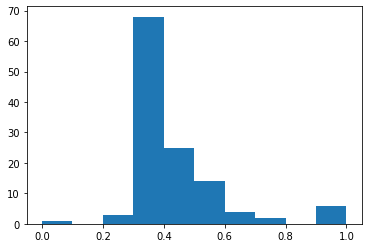

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# analyzing prediction probabilities
maxp = max(pred_prob)
minp = min(pred_prob)
norm_probs =[(i-minp)/(maxp-minp) for i in pred_prob]

plt.hist(norm_probs)
plt.show() 

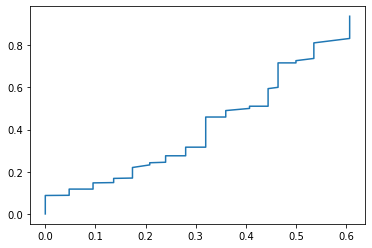

In [211]:
fpr = []
tpr = []

for item in np.arange(0.0, 1, 0.001):

    list1 = get_results(item)
    tp, tn, fp, fn,_ = conf_mat(list1[0], list1[1], list1[2], list1[3], list1[4]);
    fpr.append(len(fp)/(len(fp) + len(tn)))
    tpr.append(len(tp)/(len(tp) + len(fn)))
    

plt.plot(fpr, tpr)
plt.show()
    

In [203]:
list1 = get_results(0.001)
tp, tn, fp, fn,wrong_aln = conf_mat(list1[0], list1[1], list1[2], list1[3], list1[4])

print("F1 score: " + str(find_f1(tp, fp, fn, tn)))
print("Sensitivity: " + str(find_sens(tp, fp, fn, tn)))
print("Specificity: " + str(find_spec(tp, fp, fn, tn)))
print("Accuracy: " + str(find_acc(tp, fp, fn, tn)))
conf_mat_vis(tp, fp, fn, tn)

print("Wrong Alignment: " + str(len(wrong_aln)))


F1 score: 0.8855721393034826
Sensitivity: 0.9368421052631579
Specificity: 0.39285714285714285
Accuracy: 0.8130081300813008
╒════════════════════╤═══════════════════╤═══════════════════╕
│                    │   actual positive │   actual negative │
╞════════════════════╪═══════════════════╪═══════════════════╡
│ predicted positive │                89 │                17 │
├────────────────────┼───────────────────┼───────────────────┤
│ predicted negative │                 6 │                11 │
╘════════════════════╧═══════════════════╧═══════════════════╛
Wrong Alignment: 8
